<a href="https://colab.research.google.com/github/UmaGhildiyal/MLSC_SeasonOfAI/blob/main/HandwrittenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# fetching dataset
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
mnist = fetch_openml('mnist_784')

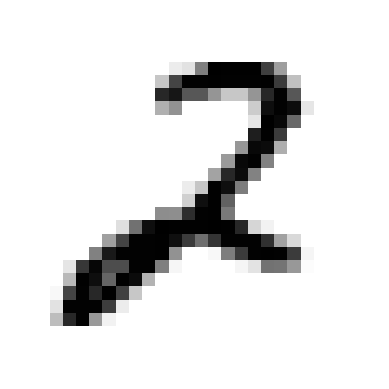

In [3]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

In [8]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# x_train, y_train = np.array(x_train), np.array(y_train)

shuffle_index = np.random.permutation(60000)

# Shuffle using iloc for Pandas DataFrame/Series
shuffle_index = np.random.permutation(60000)
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]
# x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)  # Remove quotes, as '2' is treated as a string, but you're working with integers
y_test_2 = (y_test == 2)


In [9]:
# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print(example)


[ True]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
# Cross Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())


0.9790833333333334
